**Capstone Project - End to End Data Analytics Project**

**Step 1**: *Importing Required Libraries fetch data from Web and Perform Analysis*

In [1]:
import requests
from bs4 import BeautifulSoup
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry
from concurrent.futures import ThreadPoolExecutor, as_completed
import pandas as pd
import random
import time

**Step 2:** *Reachinng E-Commerce Website for fetching the Specific Product Details*

In [2]:
BASE_URL = "https://www.amazon.in/s"
QUERY = "smartwatches"


USER_AGENTS = [
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/142.0.0.0 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 13_3_1) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.4 Safari/605.1.15",
    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/141.0.0.0 Safari/537.36",
]

**Step 3:** *Defining Session with Automatic Retry Handling*

In [3]:
session = requests.Session()
retry = Retry(connect=3, backoff_factor=1, status_forcelist=[429, 500, 502, 503, 504])
adapter = HTTPAdapter(max_retries=retry)
session.mount("http://", adapter)
session.mount("https://", adapter)

**Step 4:** *Extracting Product Data from Multiple Amazon Pages*

In [4]:
all_data = []


for page in range(1, 20):
    params = {'k': QUERY, 'page': page}
    HEADERS = {
        "User-Agent": random.choice(USER_AGENTS),
        "Accept-Language": "en-US,en;q=0.9"
    }

    print(f"\n🔍 Scraping page {page} with User-Agent: {HEADERS['User-Agent'][:50]}...")

    try:
        response = session.get(BASE_URL, params=params, headers=HEADERS, timeout=15)
        response.raise_for_status()
    except requests.RequestException as e:
        print(f"⚠️ Error on page {page}: {e}")
        time.sleep(random.uniform(10, 20))  # Long wait before retrying next page
        continue

    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract product details
    results = soup.find_all('div', {'data-component-type': 's-search-result'})
    print(f"  → Found {len(results)} products on this page.")

    for result in results:
        ProductName_tag = result.find('a', {'class':'a-link-normal s-line-clamp-2 s-line-clamp-3-for-col-12 s-link-style a-text-normal'})
        ProductPrice_tag = result.find('span', class_='a-price-whole')
        ProductRating_tag = result.find('span', class_='a-icon-alt')
        ProductNoOfReviews_tag = result.find('span', class_='a-size-mini puis-normal-weight-text s-underline-text')

        ProductName = ProductName_tag.get_text(strip=True) if ProductName_tag else None
        ProductPrice = ProductPrice_tag.get_text(strip=True) if ProductPrice_tag else None
        ProductRating = ProductRating_tag.get_text(strip=True) if ProductRating_tag else None
        ProductNoOfReviews = ProductNoOfReviews_tag.get_text(strip=True) if ProductNoOfReviews_tag else None

        all_data.append({
            "ProductName": ProductName,
            "ProductPrice": ProductPrice,
            "ProductRating": ProductRating,
            "ProductNoOfReview": ProductNoOfReviews
        })

    # Random delay (longer for safety)
    delay = random.uniform(6, 12)
    print(f"⏳ Waiting for {round(delay, 2)} seconds before next page...")
    time.sleep(delay)

print(f"\n✅ Finished scraping. Total products collected: {len(all_data)}")


🔍 Scraping page 1 with User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36...
  → Found 16 products on this page.
⏳ Waiting for 7.37 seconds before next page...

🔍 Scraping page 2 with User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWeb...
⚠️ Error on page 2: HTTPSConnectionPool(host='www.amazon.in', port=443): Max retries exceeded with url: /s?k=smartwatches&page=2 (Caused by ResponseError('too many 503 error responses'))

🔍 Scraping page 3 with User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36...
  → Found 16 products on this page.
⏳ Waiting for 6.66 seconds before next page...

🔍 Scraping page 4 with User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36...
  → Found 16 products on this page.
⏳ Waiting for 10.89 seconds before next page...

🔍 Scraping page 5 with User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36...
  → Found 22 products on this page.
⏳ Waiting for 9.6 seconds before next page...

🔍 Scraping page 6 with User-Ag

**Step 6:** *Defining Data Frame*

In [5]:
df = pd.DataFrame(all_data)
display(df.head())

,ProductName,ProductPrice,ProductRating,ProductNoOfReview
0,"GOBOULT Drift+ Smart Watch 1.85''HD Screen, Bl...",999,4.0 out of 5 stars,(2.4K)
1,"Fastrack Limitless FS2+ Smart Watch, 2.01"" Ult...","1,599",4.0 out of 5 stars,(15.1K)
2,Fire-Boltt Ninja Call Pro Max Smart Watch 2.01...,999,3.9 out of 5 stars,(1.2L)
3,"Fire-Boltt Talk Bluetooth Calling Smartwatch, ...","1,099",4.0 out of 5 stars,(58.4K)
4,"boAt Lunar Discovery w/ 1.39"" (3.5 cm) HD Disp...","1,399",3.9 out of 5 stars,(25.3K)


**Step 7:** *Exporting to CSV*

In [6]:
df.to_csv("Smartwatches.csv")

In [7]:
from google.colab import files
files.download("Smartwatches.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Step 8:** *Data Cleaning*

In [8]:
df["ProductRating"] = (df["ProductRating"].astype(str).str.extract(r"([\d.]+)").astype(float))

In [9]:
df

,ProductName,ProductPrice,ProductRating,ProductNoOfReview
0,"GOBOULT Drift+ Smart Watch 1.85''HD Screen, Bl...",999,4.0,(2.4K)
1,"Fastrack Limitless FS2+ Smart Watch, 2.01"" Ult...","1,599",4.0,(15.1K)
2,Fire-Boltt Ninja Call Pro Max Smart Watch 2.01...,999,3.9,(1.2L)
3,"Fire-Boltt Talk Bluetooth Calling Smartwatch, ...","1,099",4.0,(58.4K)
4,"boAt Lunar Discovery w/ 1.39"" (3.5 cm) HD Disp...","1,399",3.9,(25.3K)
...,...,...,...,...
289,"HAMMER Active 2.0 Plus 2.1"" HD Display Smart W...","2,199",3.7,(311)
290,"GameSir 24K Golden Smart Watch 2.18"" HD Displa...","1,199",3.1,(19)
291,PunnkFunnk Metal Chain Active 2 Max Bluetooth ...,"1,348",2.7,(11)
292,Fire-Boltt Vintage Smartwatch 39.1mm (1.52 inc...,"1,699",3.2,(133)


In [10]:
df = df.rename(columns={'ProductNoOfReview': 'Reviews'})

**Step 9:** *Data Cleaning and Type Conversion for Structured Analysis*

In [11]:
df["ProductPrice"] = (df["ProductPrice"].astype(str).replace('[₹, ]', '', regex=True).replace('', None).apply(pd.to_numeric, errors='coerce').astype("Int64"))


def clean_reviews(x):
    if pd.isna(x):
        return None
    x = str(x).strip("()").replace(",", "").strip()
    if x.lower() == "none" or x == "":
        return None
    if "K" in x:
        return int(float(x.replace("K", "")) * 1000)
    elif "M" in x:
        return int(float(x.replace("M", "")) * 1_000_000)
    else:
        try:
            return int(float(x))
        except:
            return None

df["Reviews"] = df["Reviews"].apply(clean_reviews).astype("Int64")

# Ensure 'Rating_Out_of_5' is float
df["ProductRating"] = df["ProductRating"].astype(float)

# Check types and sample output
print(df.dtypes)
print(df.head())

ProductName       object
ProductPrice       Int64
ProductRating    float64
Reviews            Int64
dtype: object
                                         ProductName  ProductPrice  \
0  GOBOULT Drift+ Smart Watch 1.85''HD Screen, Bl...           999   
1  Fastrack Limitless FS2+ Smart Watch, 2.01" Ult...          1599   
2  Fire-Boltt Ninja Call Pro Max Smart Watch 2.01...           999   
3  Fire-Boltt Talk Bluetooth Calling Smartwatch, ...          1099   
4  boAt Lunar Discovery w/ 1.39" (3.5 cm) HD Disp...          1399   

   ProductRating  Reviews  
0            4.0     2400  
1            4.0    15100  
2            3.9     <NA>  
3            4.0    58400  
4            3.9    25300  


In [12]:
df

,ProductName,ProductPrice,ProductRating,Reviews
0,"GOBOULT Drift+ Smart Watch 1.85''HD Screen, Bl...",999,4.0,2400
1,"Fastrack Limitless FS2+ Smart Watch, 2.01"" Ult...",1599,4.0,15100
2,Fire-Boltt Ninja Call Pro Max Smart Watch 2.01...,999,3.9,<NA>
3,"Fire-Boltt Talk Bluetooth Calling Smartwatch, ...",1099,4.0,58400
4,"boAt Lunar Discovery w/ 1.39"" (3.5 cm) HD Disp...",1399,3.9,25300
...,...,...,...,...
289,"HAMMER Active 2.0 Plus 2.1"" HD Display Smart W...",2199,3.7,311
290,"GameSir 24K Golden Smart Watch 2.18"" HD Displa...",1199,3.1,19
291,PunnkFunnk Metal Chain Active 2 Max Bluetooth ...,1348,2.7,11
292,Fire-Boltt Vintage Smartwatch 39.1mm (1.52 inc...,1699,3.2,133


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ProductName    294 non-null    object 
 1   ProductPrice   292 non-null    Int64  
 2   ProductRating  286 non-null    float64
 3   Reviews        284 non-null    Int64  
dtypes: Int64(2), float64(1), object(1)
memory usage: 9.9+ KB


In [14]:
df.describe()

,ProductPrice,ProductRating,Reviews
count,292.0,286.000000,284.0
mean,7830.243151,3.832517,3516.299296
std,19527.591719,0.489208,11505.008338
min,219.0,2.500000,1.0
25%,1299.0,3.600000,27.25
50%,1995.0,3.900000,150.5
75%,3999.0,4.100000,937.75
max,157990.0,5.000000,96700.0


In [15]:
df.isnull().sum()

,0
ProductName,0
ProductPrice,2
ProductRating,8
Reviews,10


**Step 10:** *Handling the Missing Values*

In [16]:
mean_price = round(df["ProductPrice"].mean())
df["ProductPrice"] = df["ProductPrice"].fillna(mean_price).astype("Int64")
mean_review = round(df["Reviews"].mean())
df["Reviews"] = df["Reviews"].fillna(mean_review).astype("Int64")
df["ProductRating"] = df["ProductRating"].astype(float)
df["ProductRating"] = df["ProductRating"].fillna(round(df["ProductRating"].mean(), 1))

In [17]:
df.isnull().sum().sum()

np.int64(0)

**Step 11:** *Cleaned Dataset*

In [18]:
df

,ProductName,ProductPrice,ProductRating,Reviews
0,"GOBOULT Drift+ Smart Watch 1.85''HD Screen, Bl...",999,4.0,2400
1,"Fastrack Limitless FS2+ Smart Watch, 2.01"" Ult...",1599,4.0,15100
2,Fire-Boltt Ninja Call Pro Max Smart Watch 2.01...,999,3.9,3516
3,"Fire-Boltt Talk Bluetooth Calling Smartwatch, ...",1099,4.0,58400
4,"boAt Lunar Discovery w/ 1.39"" (3.5 cm) HD Disp...",1399,3.9,25300
...,...,...,...,...
289,"HAMMER Active 2.0 Plus 2.1"" HD Display Smart W...",2199,3.7,311
290,"GameSir 24K Golden Smart Watch 2.18"" HD Displa...",1199,3.1,19
291,PunnkFunnk Metal Chain Active 2 Max Bluetooth ...,1348,2.7,11
292,Fire-Boltt Vintage Smartwatch 39.1mm (1.52 inc...,1699,3.2,133


In [19]:
df.to_excel("Smartwatches.xlsx", index=False)

In [20]:
from google.colab import files
files.download("Smartwatches.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Step 12:** *Exploratory Data Analytics*

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

*Univariate Analysis for Price Distribution*

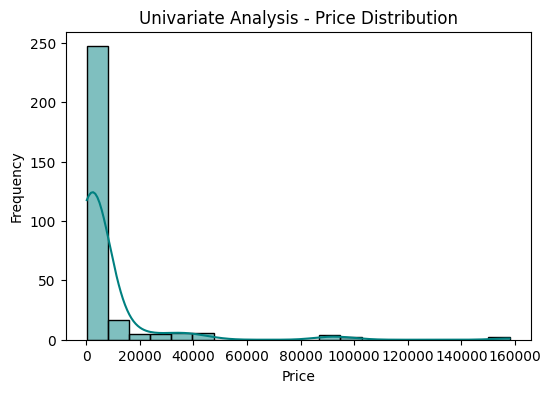

In [22]:
plt.figure(figsize=(6,4))
sns.histplot(df['ProductPrice'], bins=20, kde=True, color='teal')
plt.title("Univariate Analysis - Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

*Bivariate Analysis for Price with respect to Rating*

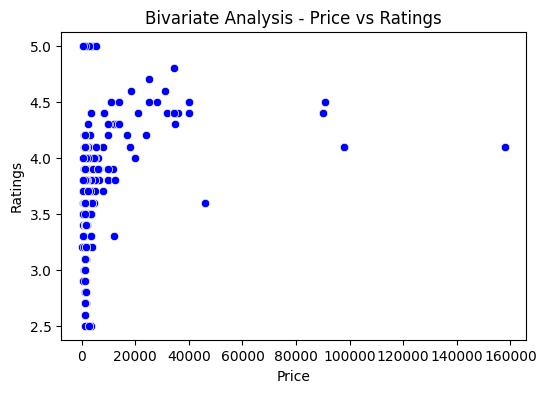

In [23]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='ProductPrice', y='ProductRating', data=df, color='blue')
plt.title("Bivariate Analysis - Price vs Ratings")
plt.xlabel("Price")
plt.ylabel("Ratings")
plt.show()

*Multivariate Analysis for Price with respect to Reviews*

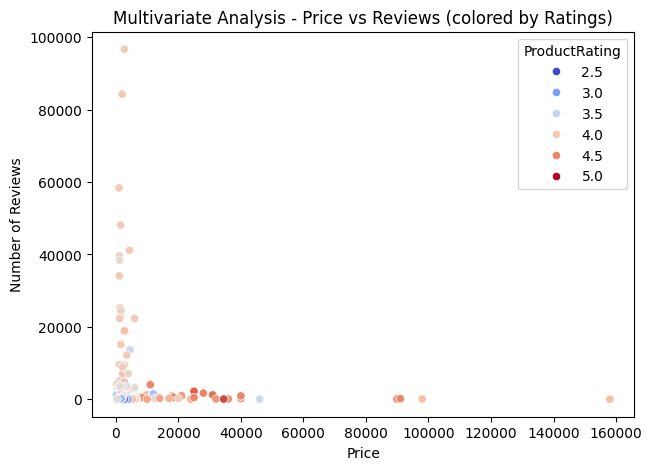

In [24]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='ProductPrice', y='Reviews', hue='ProductRating', data=df, palette='coolwarm')
plt.title("Multivariate Analysis - Price vs Reviews (colored by Ratings)")
plt.xlabel("Price")
plt.ylabel("Number of Reviews")
plt.show()

**Step 13:** *Statistical Methods for Trends, Correlations & Outliers*

In [25]:
import numpy as np
import scipy.stats as stats

*Correlation Analysis*


 Correlation Matrix:
                ProductPrice  ProductRating   Reviews
ProductPrice       1.000000       0.271644 -0.083747
ProductRating      0.271644       1.000000  0.086983
Reviews           -0.083747       0.086983  1.000000


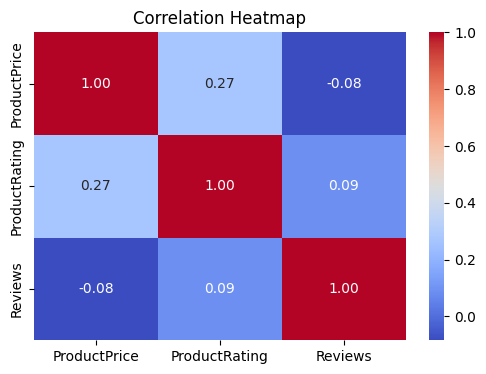

In [26]:
corr_matrix = df[['ProductPrice', 'ProductRating', 'Reviews']].corr(method='pearson')
print("\n Correlation Matrix:\n", corr_matrix)

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

*Outlier Detection Using Box Plot*

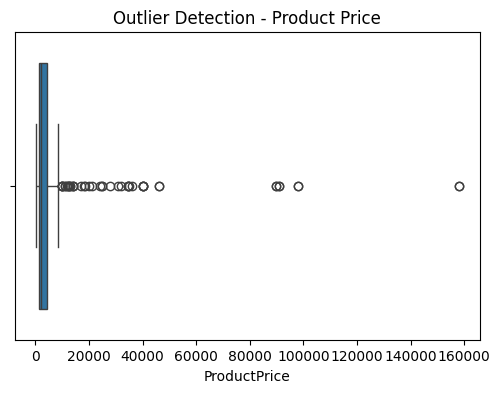

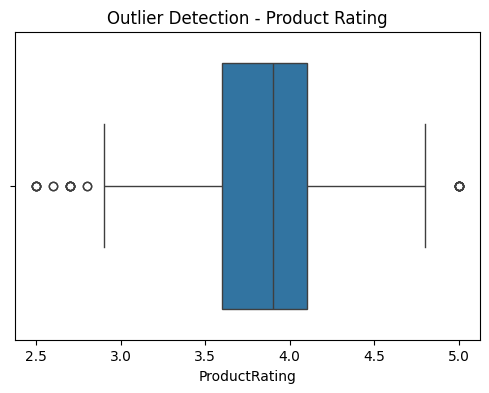

In [27]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['ProductPrice'])
plt.title("Outlier Detection - Product Price")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['ProductRating'])
plt.title("Outlier Detection - Product Rating")
plt.show()

In [28]:
Q1 = df['ProductPrice'].quantile(0.25)
Q3 = df['ProductPrice'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['ProductPrice'] < (Q1 - 1.5*IQR)) | (df['ProductPrice'] > (Q3 + 1.5*IQR))]
print(f" Number of Price Outliers: {len(outliers)}")

 Number of Price Outliers: 45


**Step 14:** *Hypothesis Testing*

*Hypothesis 1: Relationship between Rating and Price*

*Testing if high rated products has higher price*

In [29]:
high_rated = df[df['ProductRating'] >= 4.0]['ProductPrice']
low_rated = df[df['ProductRating'] < 4.0]['ProductPrice']

In [30]:
t_stat, p_val = stats.ttest_ind(high_rated, low_rated, equal_var=False)
print(f"\n💡 Hypothesis 1: Price vs Rating")
print(f"T-statistic = {t_stat:.3f}, P-value = {p_val:.4f}")

if p_val < 0.05:
    print(" Reject H0 → High-rated products have significantly different prices.")
else:
    print(" Fail to Reject H0 → No significant difference in prices.")


💡 Hypothesis 1: Price vs Rating
T-statistic = 4.547, P-value = 0.0000
 Reject H0 → High-rated products have significantly different prices.


*Hypothesis 2: Relationship between Reviews and Ratings*

*If number of reviews differs across rating groups*

In [31]:
corr, p_value = stats.pearsonr(df['Reviews'], df['ProductRating'])
print(f"\n💡 Hypothesis 2: Correlation between Reviews and Ratings")
print(f"Correlation = {corr:.3f}, P-value = {p_value:.4f}")

if p_value < 0.05:
    print("Reject H0 → Significant correlation between reviews and ratings.")
else:
    print("Fail to Reject H0 → No significant correlation.")


💡 Hypothesis 2: Correlation between Reviews and Ratings
Correlation = 0.087, P-value = 0.1368
Fail to Reject H0 → No significant correlation.


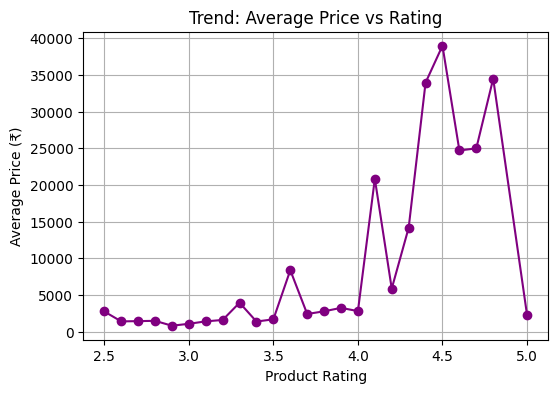

In [32]:
avg_price_by_rating = df.groupby('ProductRating')['ProductPrice'].mean()

plt.figure(figsize=(6,4))
avg_price_by_rating.plot(kind='line', marker='o', color='purple')
plt.title("Trend: Average Price vs Rating")
plt.xlabel("Product Rating")
plt.ylabel("Average Price (₹)")
plt.grid(True)
plt.show()

*ANOVA: Checking wheather Prices Differ significantly across Rating Group*

In [33]:
df['RatingGroup'] = pd.cut(df['ProductRating'], bins=[0, 3, 4, 5],
                           labels=['Low', 'Medium', 'High'])


groups = [group['ProductPrice'].values for name, group in df.groupby('RatingGroup')]

f_stat, p_val = stats.f_oneway(*groups)
print(f"\n💡 ANOVA Test: Price Difference Among Rating Groups")
print(f"F-statistic = {f_stat:.3f}, P-value = {p_val:.4f}")

if p_val < 0.05:
    print("Reject H0 → Significant price differences exist between rating groups.")
else:
    print("Fail to Reject H0 → Prices are not significantly different across rating groups.")


💡 ANOVA Test: Price Difference Among Rating Groups
F-statistic = 29.533, P-value = 0.0000
Reject H0 → Significant price differences exist between rating groups.


/tmp/ipython-input-1178720317.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['ProductPrice'].values for name, group in df.groupby('RatingGroup')]
